## Assignment Week 6

This week we are using Pandas.

In [10]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## RMS Titanic 

One file is provided:
  * ```titanic.csv``` - this file contains titanic passenger information

The file ```titanic.csv``` provides passenger information on the ship RMS Titanic that sank on her maiden voyage on April 15, 1912. 

**1.** Read the passenger information of the Titanic. Show an overview of _unique_ last names of the passenger list (so ignore the first names and the "Mr", "Mrs.", etc) **and** determine the number of different last names.

In [11]:
df = pd.read_csv('titanic.csv')
df['Last_Name'] = ''                             # Add a new column called Last_Name in dataframe

for i in range(len(df)):
    name_split = df.loc[i,'Name'].split(',',1)   # Split the name at the comma
    l_name = name_split[0]                       # First element is the last name
    df.loc[i,'Last_Name'] = l_name               # Add to the Last_Name column

unique_last_name = df['Last_Name'].unique()      # Keep only unique last names in an array
print(unique_last_name[:10])                     # Show the first 10 unique last names
print('The number of different last names is:',len(unique_last_name))

['Kelly' 'Wilkes' 'Myles' 'Wirz' 'Hirvonen' 'Svensson' 'Connolly'
 'Caldwell' 'Abrahim' 'Davies']
The number of different last names is: 352


**2.** Assuming that passengers with the same last name form a family, determine how big the largest family aboard the Titanic was.

In [12]:
max_number = max(df['Last_Name'].value_counts()) # Count the frequency of each last name,
                                                 # then find the highest frequency
print('The largest family onboard has', max_number, 'members.')

The largest family onboard has 4 members.


**3.** Drop all the rows for which the Fare is 0 or NaN. Store the result.

In [13]:
df2 = df.dropna()
df3 = df2[df2.Fare != 0]

print(df3)

     PassengerId  Pclass                                               Name  \
12           904       1      Snyder, Mrs. John Pillsbury (Nelle Stevenson)   
14           906       1  Chaffee, Mrs. Herbert Fuller (Carrie Constance...   
24           916       1    Ryerson, Mrs. Arthur Larned (Emily Maria Borie)   
26           918       1                       Ostby, Miss. Helene Ragnhild   
28           920       1                            Brady, Mr. John Bertram   
34           926       1                           Mock, Mr. Philipp Edmund   
44           936       1   Kimball, Mrs. Edwin Nelson Jr (Gertrude Parsons)   
46           938       1                           Chevre, Mr. Paul Romaine   
48           940       1    Bucknell, Mrs. William Robert (Emma Eliza Ward)   
50           942       1                           Smith, Mr. Lucien Philip   
53           945       1                         Fortune, Miss. Ethel Flora   
57           949       3                      Abelse

**4.** Show the average Fare price per Passenger Class (Pclass) in a bar chart.

Text(0, 0.5, 'Average Fare Price')

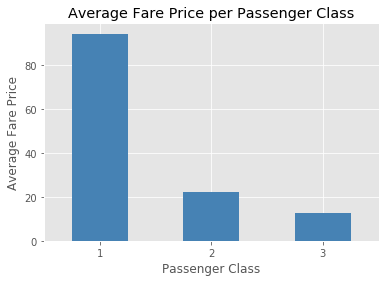

In [14]:
df4 = df.groupby('Pclass')['Fare'].mean()
plot1 = df4.plot.bar(title = "Average Fare Price per Passenger Class", rot = 0, color = '#4682B4')

plot1.set_xlabel("Passenger Class")
plot1.set_ylabel("Average Fare Price")

**5.** Plot a histogram of the passenger's age, grouped by sex. So the end-result should show separate  histograms for males and females.

Text(0.5, 1.1, "Histogram of the passenger's age, grouped by sex")

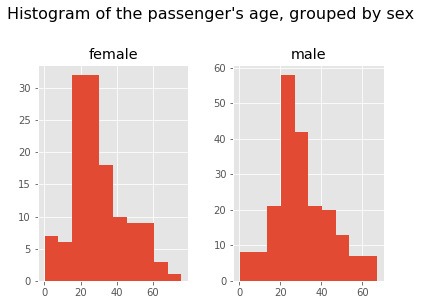

In [27]:
plot2 = df['Age'].hist(by=df['Sex'],rot = 0)
plt.suptitle("Histogram of the passenger's age, grouped by sex", y =1.1, size = 16)
